In [36]:
#Importing all required librariers
from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

import graphviz

import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummarya

In [4]:
#Loading data
ubank_df = pd.read_csv('UniversalBank.csv')
ubank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
uvbank_df = ubank_df.drop(['ID','ZIP Code'],axis=1)
uvbank_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [6]:
uvbank_df.shape

(5000, 12)

In [7]:
uvbank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [8]:
uvbank_df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
#identifying outliers 
outlier = uvbank_df[uvbank_df['Experience']<0]
outlier.head()
print(outlier.shape)

(52, 12)


In [10]:
#removing outliers
uvbank_df = uvbank_df[uvbank_df['Experience']>=0]
uvbank_df.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,45.557195,20.331043,73.814470,2.391471,1.935926,1.878941,56.634398,0.097009,0.104285,0.061035,0.597009,0.294058
std,11.320735,11.311973,46.112596,1.148444,1.747694,0.839745,101.828885,0.296000,0.305660,0.239418,0.490549,0.455664
min,24.000000,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,10.750000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


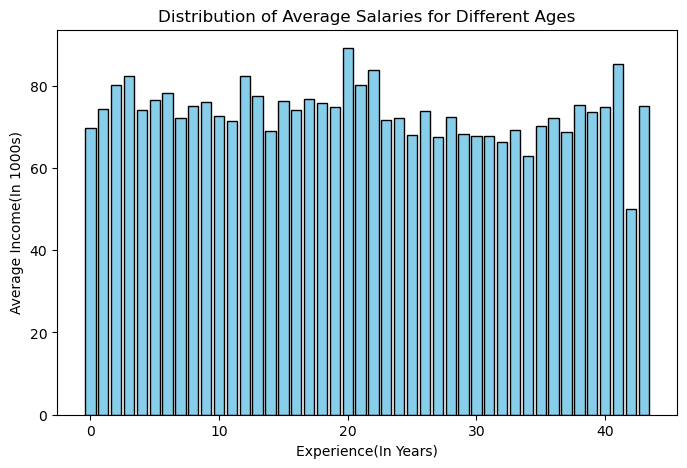

In [64]:

average_income_by_exp = uvbank_df.groupby('Experience')['Income'].mean()

# Plotting the histogram with bar lengths representing the average income
plt.figure(figsize=(8,5))
plt.bar(average_income_by_exp.index, average_income_by_exp, color='skyblue', edgecolor='black')
plt.xlabel('Experience(In Years)')
plt.ylabel('Average Income(In 1000s)')
plt.title('Distribution of Average Salaries for Different Ages')
plt.show()

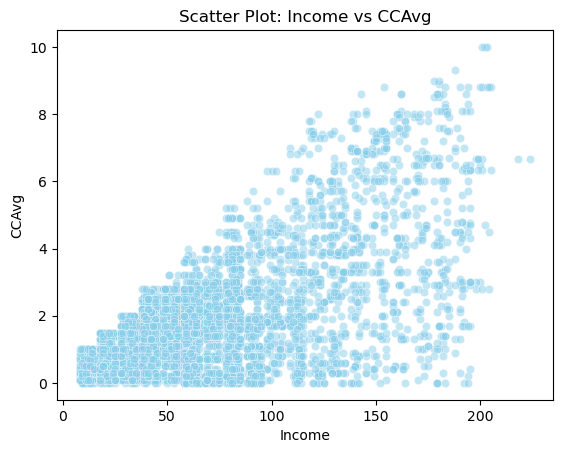

In [68]:
sns.scatterplot(x='Income', y='CCAvg', data=uvbank_df, color='skyblue', alpha=0.5)
plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.title('Scatter Plot: Income vs CCAvg')
plt.show()

In [11]:
#Partition the data into train and valid. Make sure you set seed
trainData= uvbank_df.sample(frac=0.7, random_state=2)
# assign rows that are not already in the training set, into validation 
validData = uvbank_df.drop(trainData.index)

print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print()

Training   :  (3464, 12)
Validation :  (1484, 12)



In [13]:
#Giving new datapoint to predict
newloan = pd.DataFrame({'Age': [49], 'Experience': [25], 'Income': [170], 
                      'Family': [3], 'CCAvg': [7.6], 'Education': [3], 
                     'Mortgage': [0], 'Securities Account': [0], 'CD Account': [1],
                      'Online': [1], 'CreditCard': [1]})
newloan

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,49,25,170,3,7.6,3,0,0,1,1,1


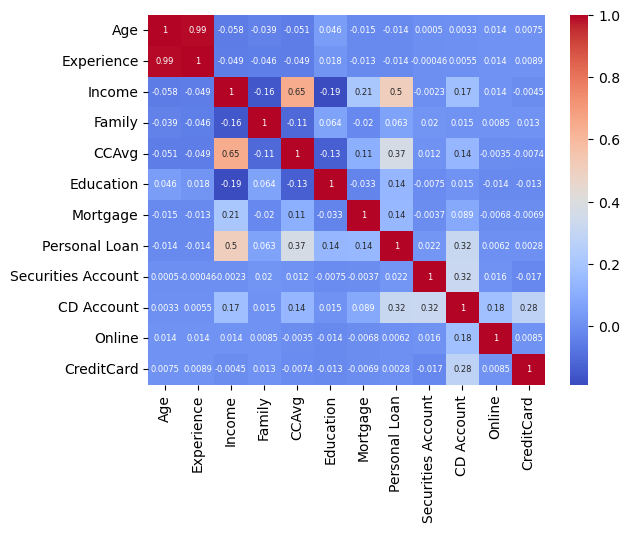

In [14]:
corr_matrix = uvbank_df.corr()
annot_font_size = 6
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={'fontsize': annot_font_size})

plt.show()

In [15]:
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education','Mortgage', 'Securities Account', 'CD Account','Online', 'CreditCard']])  # Note the use of an array of column names

# Transform the full dataset
banknorm = pd.DataFrame(scaler.transform(uvbank_df[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education','Mortgage', 'Securities Account', 'CD Account','Online', 'CreditCard']]), 
                                   columns=['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zEducation','zMortgage', 'zSecurities Account', 'zCD Account','zOnline', 'zCreditCard'])

banknorm['Personal Loan']=uvbank_df['Personal Loan']


# Use iloc with the indices of trainData and validData
trainNorm = banknorm[banknorm.index.isin(trainData.index)]
validNorm = banknorm[banknorm.index.isin(validData.index)]

print(trainNorm)
print(validNorm)

          zAge  zExperience   zIncome   zFamily    zCCAvg  zEducation  \
2    -0.575461    -0.467751 -1.345418 -1.220049 -0.523135   -1.062468   
3    -0.928681    -0.997201  0.579321 -1.220049  0.462492    0.126672   
4    -0.928681    -1.085442 -0.610125  1.389821 -0.523135    0.126672   
5    -0.752071    -0.644235 -0.956145  1.389821 -0.871004    0.126672   
6     0.660809     0.591147 -0.026215 -0.350092 -0.233245    0.126672   
...        ...          ...       ...       ...       ...         ...   
4942  1.632165     1.738287  0.038664  0.519864  0.056646    1.315813   
4943 -1.458512    -1.526650 -0.718256 -1.220049 -0.001332    1.315813   
4944 -1.370207    -1.438408 -1.258913  1.389821 -0.871004   -1.062468   
4945  1.543860     1.650045 -1.064277 -0.350092 -0.928982    1.315813   
4946  1.720470     1.738287 -0.523619  0.519864 -0.813026    0.126672   

      zMortgage  zSecurities Account  zCD Account   zOnline  zCreditCard  \
2     -0.564828            -0.336851    -0.2508

In [17]:
uvbank_df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [18]:
newNorm=pd.DataFrame(scaler.transform(newloan[['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account','Online', 'CreditCard']]), 
                                    columns=['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zEducation',
       'zMortgage','zSecurities Account', 'zCD Account','zOnline', 'zCreditCard'])
newNorm

,zAge,zExperience,zIncome,zFamily,zCCAvg,zEducation,zMortgage,zSecurities Account,zCD Account,zOnline,zCreditCard
0,0.307589,0.414664,2.093161,0.519864,3.303419,1.315813,-0.564828,-0.336851,3.987175,0.819151,1.567509


In [19]:
knn = KNeighborsClassifier(n_neighbors=3).fit(trainNorm[['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zEducation',
       'zMortgage','zSecurities Account', 'zCD Account','zOnline', 'zCreditCard']], trainNorm['Personal Loan'])
distances, indices = knn.kneighbors(newNorm)
print(knn.predict(newNorm))
print('Distances',distances)
print('Indices', indices)

print(trainNorm.iloc[indices[0], :])

[0.]
Distances [[1.55471989 1.6247933  1.69113469]]
Indices [[1413 1385 1956]]
          zAge  zExperience   zIncome   zFamily    zCCAvg  zEducation  \
2026 -0.222241    -0.379510  1.898524  0.519864  3.535331    0.126672   
1985  0.130979     0.238181  2.093161 -0.350092  2.665660    0.126672   
2806 -0.045631     0.061698  1.292988  1.389821  2.201835    1.315813   

      zMortgage  zSecurities Account  zCD Account   zOnline  zCreditCard  \
2026  -0.564828            -0.336851     3.987175  0.819151     1.567509   
1985  -0.564828            -0.336851     3.987175  0.819151     1.567509   
2806  -0.564828            -0.336851     3.987175  0.819151     1.567509   

      Personal Loan  
2026            0.0  
1985            0.0  
2806            0.0  


In [20]:
knn.kneighbors(validNorm[['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zEducation',
       'zMortgage','zSecurities Account', 'zCD Account','zOnline', 'zCreditCard']])
knn.predict(validNorm[['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zEducation',
       'zMortgage','zSecurities Account', 'zCD Account','zOnline', 'zCreditCard']])

array([0., 0., 0., ..., 0., 0., 0.])

In [21]:
train_X = trainNorm[['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zEducation',
       'zMortgage','zSecurities Account', 'zCD Account','zOnline', 'zCreditCard']]
train_y = trainNorm['Personal Loan']
valid_X = validNorm[['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zEducation',
       'zMortgage','zSecurities Account', 'zCD Account','zOnline', 'zCreditCard']]
valid_y = validNorm['Personal Loan']

# Train a classifier for different values of k
results = []
for k in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.829352
1    2  0.891468
2    3  0.878498
3    4  0.894198
4    5  0.892150
5    6  0.896246
6    7  0.894198
7    8  0.896928
8    9  0.896928
9   10  0.896928
10  11  0.896928
11  12  0.897611
12  13  0.896928
13  14  0.897611
14  15  0.897611
15  16  0.897611
16  17  0.897611
17  18  0.897611
18  19  0.897611
19  20  0.897611
20  21  0.897611
21  22  0.897611
22  23  0.897611
23  24  0.897611


# Best value of K is 12. at K=12 we are having a maximum accuracy of 89.76%

In [22]:
#Retraining the data using k=12
knn = KNeighborsClassifier(n_neighbors=12).fit(trainNorm[['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zEducation',
       'zMortgage','zSecurities Account', 'zCD Account','zOnline', 'zCreditCard']], trainNorm['Personal Loan'])
distances, indices = knn.kneighbors(newNorm)
print(knn.predict(newNorm))
print('Distances',distances)
print('Indices', indices)

print(trainNorm.iloc[indices[0], :])

[0.]
Distances [[1.55471989 1.6247933  1.69113469 1.92178276 2.0623849  2.16348289
  2.30384372 2.36323297 2.56322854 2.62998117 2.63984498 2.72429817]]
Indices [[1413 1385 1956   88  707 1659  842  388  532 2953 3353  521]]
          zAge  zExperience   zIncome   zFamily    zCCAvg  zEducation  \
2026 -0.222241    -0.379510  1.898524  0.519864  3.535331    0.126672   
1985  0.130979     0.238181  2.093161 -0.350092  2.665660    0.126672   
2806 -0.045631     0.061698  1.292988  1.389821  2.201835    1.315813   
130   1.102334     1.208838  1.639009  1.389821  3.071506    0.126672   
1022  0.925724     0.855872  1.552504  1.389821  2.201835    0.126672   
2379  1.367250     1.385321  2.071534 -0.350092  2.433747    1.315813   
1220 -0.663766    -0.644235  2.071534 -1.220049  2.839594    1.315813   
559   0.660809     0.679389  2.201292  0.519864  0.984295    1.315813   
772   0.042674     0.149939  1.963403 -0.350092  3.303419   -1.062468   
4263  1.720470     1.826529  2.093161  1.3898

In [23]:
knn.kneighbors(validNorm[['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zEducation',
       'zMortgage','zSecurities Account', 'zCD Account','zOnline', 'zCreditCard']])
knn.predict(validNorm[['zAge', 'zExperience', 'zIncome', 'zFamily', 'zCCAvg', 'zEducation',
       'zMortgage','zSecurities Account', 'zCD Account','zOnline', 'zCreditCard']])

array([0., 0., 0., ..., 0., 0., 0.])

### Classification Tree

In [69]:
classTree = DecisionTreeClassifier(random_state=1, max_depth=3)
classTree.fit(uvbank_df.drop(columns=['Personal Loan']), uvbank_df['Personal Loan'])

DecisionTreeClassifier(max_depth=3, random_state=1)

In [70]:
print("Classes: {}".format(', '.join([str(label) for label in classTree.classes_])))


Classes: 0, 1


In [72]:
classificationSummary(uvbank_df['Personal Loan'], classTree.predict(uvbank_df.drop(columns=['Personal Loan'])))

Confusion Matrix (Accuracy 0.9832)

       Prediction
Actual    0    1
     0 4462    6
     1   77  403


# 